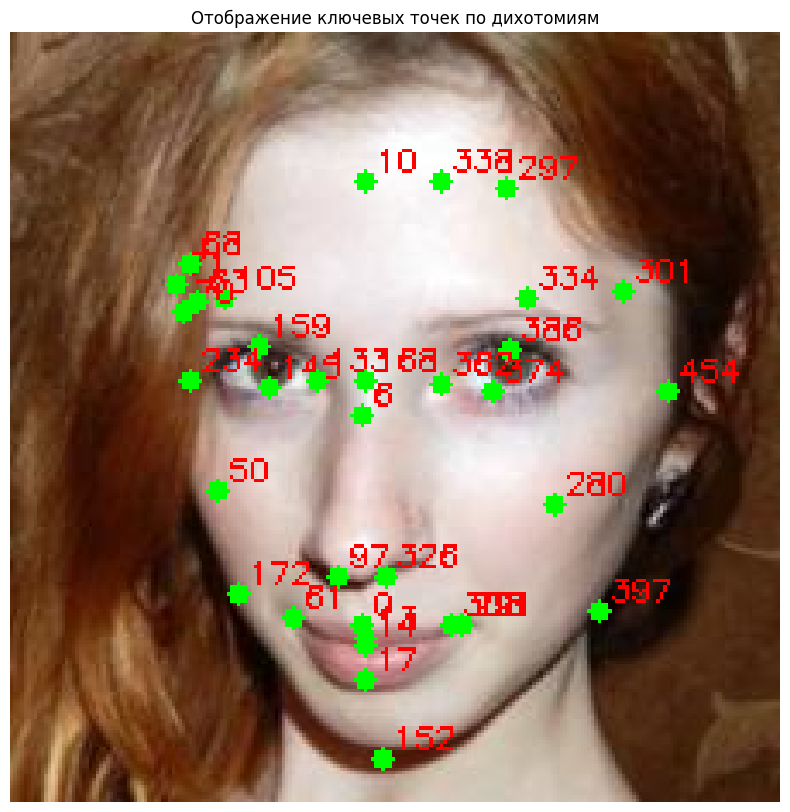

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Загружаем изображение
image_path = r'E:\Project VS\Machine-Learning\data\1mvbji9E8j8.jpg'  # ← ЗАМЕНИ на путь к своему изображению
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Инициализация MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Получаем результаты
results = face_mesh.process(image_rgb)
h, w, _ = image.shape

# Список интересующих landmark'ов по дихотомиям
landmark_ids = [
    # Рациональность – Иррациональность
    10, 338, 297, 71, 105, 68, 301, 334, 308, 70, 63, 159, 145, 386, 374, 152, 234, 454,
    # Логика – Этика
    172, 397, 61, 291, 13, 14, 0,
    # Экстраверсия – Интроверсия
    17, 97, 326, 6, 168,
    # Сенсорика – Интуиция
    133, 362, 50, 280
]

# Отобразим изображение с выбранными точками
if results.multi_face_landmarks:
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
        for idx in landmark_ids:
            lm = face_landmarks.landmark[idx]
            x, y = int(lm.x * w), int(lm.y * h)
            cv2.circle(annotated_image, (x, y), 3, (0, 255, 0), -1)
            cv2.putText(annotated_image, str(idx), (x+3, y-3), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

    # Показываем результат
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Отображение ключевых точек по дихотомиям')
    plt.show()
else:
    print("Лицо не найдено.")
